## 命题部分

In [67]:
import cv2 ,matplotlib.pyplot as plt ,numpy as np,uuid,random,libnum,base64
s=['','']
s[1] = ''.join([chr(i) for i in range(33,127,2)] )
s[0] = ''.join([chr(i) for i in range(34,127,2)] )+' '
sall = ''.join([chr(i) for i in range(33,127)] )+' '
flag=f'''ctfshow{{{uuid.uuid4()}}}'''
flag = f'Good Job!CharTab is: {sall[:-1]}.flag is:'+ ''.join([random.choice(s[int(i)]) for i in libnum.s2b(base64.b64encode(flag.encode()))])+'        THE END'

img = cv2.imread('z:/ctf/a.png')[:,:,0]//200
imgtab={}
for i in range(len(sall)):
    imgtab[sall[i]] = [int((j+ord('0')).tobytes().decode(),2)  for j in img[:,i*16:i*16+16]]  

imgo = cv2.imread('z:/ctf/o.png').astype(np.uint16)
imgo |= imgo<<8
h,w, c = imgo.shape
data = np.array([imgtab[i] for i in flag ]).flatten()
for i in range(len(data)):
    y,x = divmod(i,w)  
    imgo[y,x] = data[i]
cv2.imwrite('z:/ctf/flag.png', imgo)

True

## 分析部分

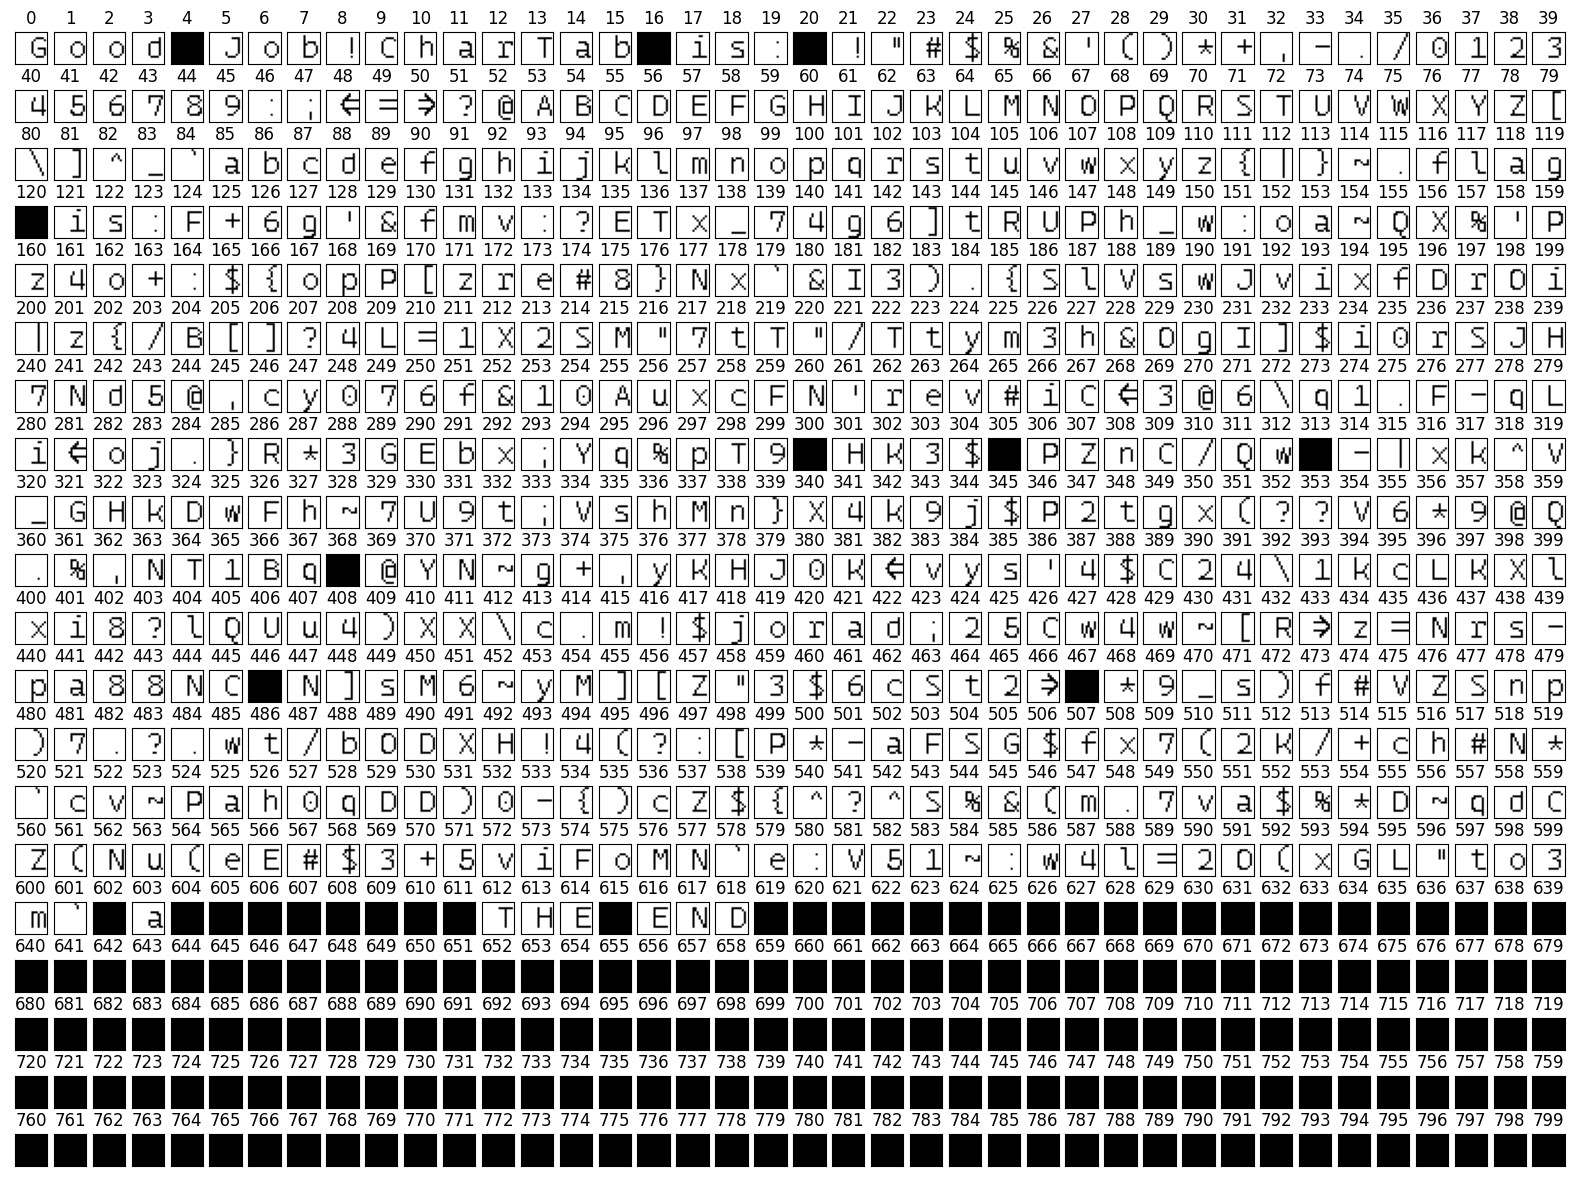

In [68]:
import cv2 ,matplotlib.pyplot as plt ,numpy as np,uuid,random,libnum,base64
img = cv2.imread('z:/ctf/flag.png', -1)[:,:,0].flatten()
img = np.array([img[:len(img)//16] >>(15-i) &1 for i in range(16)]).transpose([1,0]).reshape(-1,16,16)
plt.figure(figsize=(20,30))
for i in range(800):
    plt.subplot(40,40,i+1)
    plt.xticks([]) 
    plt.yticks([])
    plt.title(f'{i}')
    plt.imshow(img[i],cmap='gray')

## 解题部分

In [91]:
import cv2 ,numpy as np ,libnum,base64
img = cv2.imread('z:/ctf/flag.png', -1)[:,:,0].flatten()
img = np.array([img[:len(img)//16] >>(15-i) &1 for i in range(16)]).transpose([1,0]).reshape(-1,16,16)
abtab = {img[i-12].tobytes():chr(i) for i in range(32,127)}
chars = ''.join( [abtab[i.tobytes()] for i in img[:604]][124:])
binf = ''.join([str(i&1) for i in chars.encode()])
print(base64.b64decode(libnum.n2s(int(binf[:len(binf)//8*8],2))))



b'ctfshow{8728eac7-30e4-4e4a-ad87-312e822a40cd}'
